In [138]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import imshow
import pylab
import matplotlib.image as mpimg
import pandas as pd
from cStringIO import StringIO

import boto
import gcs_oauth2_boto_plugin

# Function to render picture nicely
from io import BytesIO
from IPython import display

# Our utility functions
import util
from util import *


def display_pil_image(im):
   """Displayhook function for PIL Images, rendered as PNG."""

   b = BytesIO()
   im.save(b, format='png')
   data = b.getvalue()

   ip_img = display.Image(data=data, format='png', embed=True)
   return ip_img._repr_png_()
png_formatter = get_ipython().display_formatter.formatters['image/png']
dpi = png_formatter.for_type(Image.Image, display_pil_image)


def display_image(raw_image):
    subsampled_image = resample_image(raw_image)
    img = Image.fromarray(subsampled_image, 'L')
    display.display(img)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


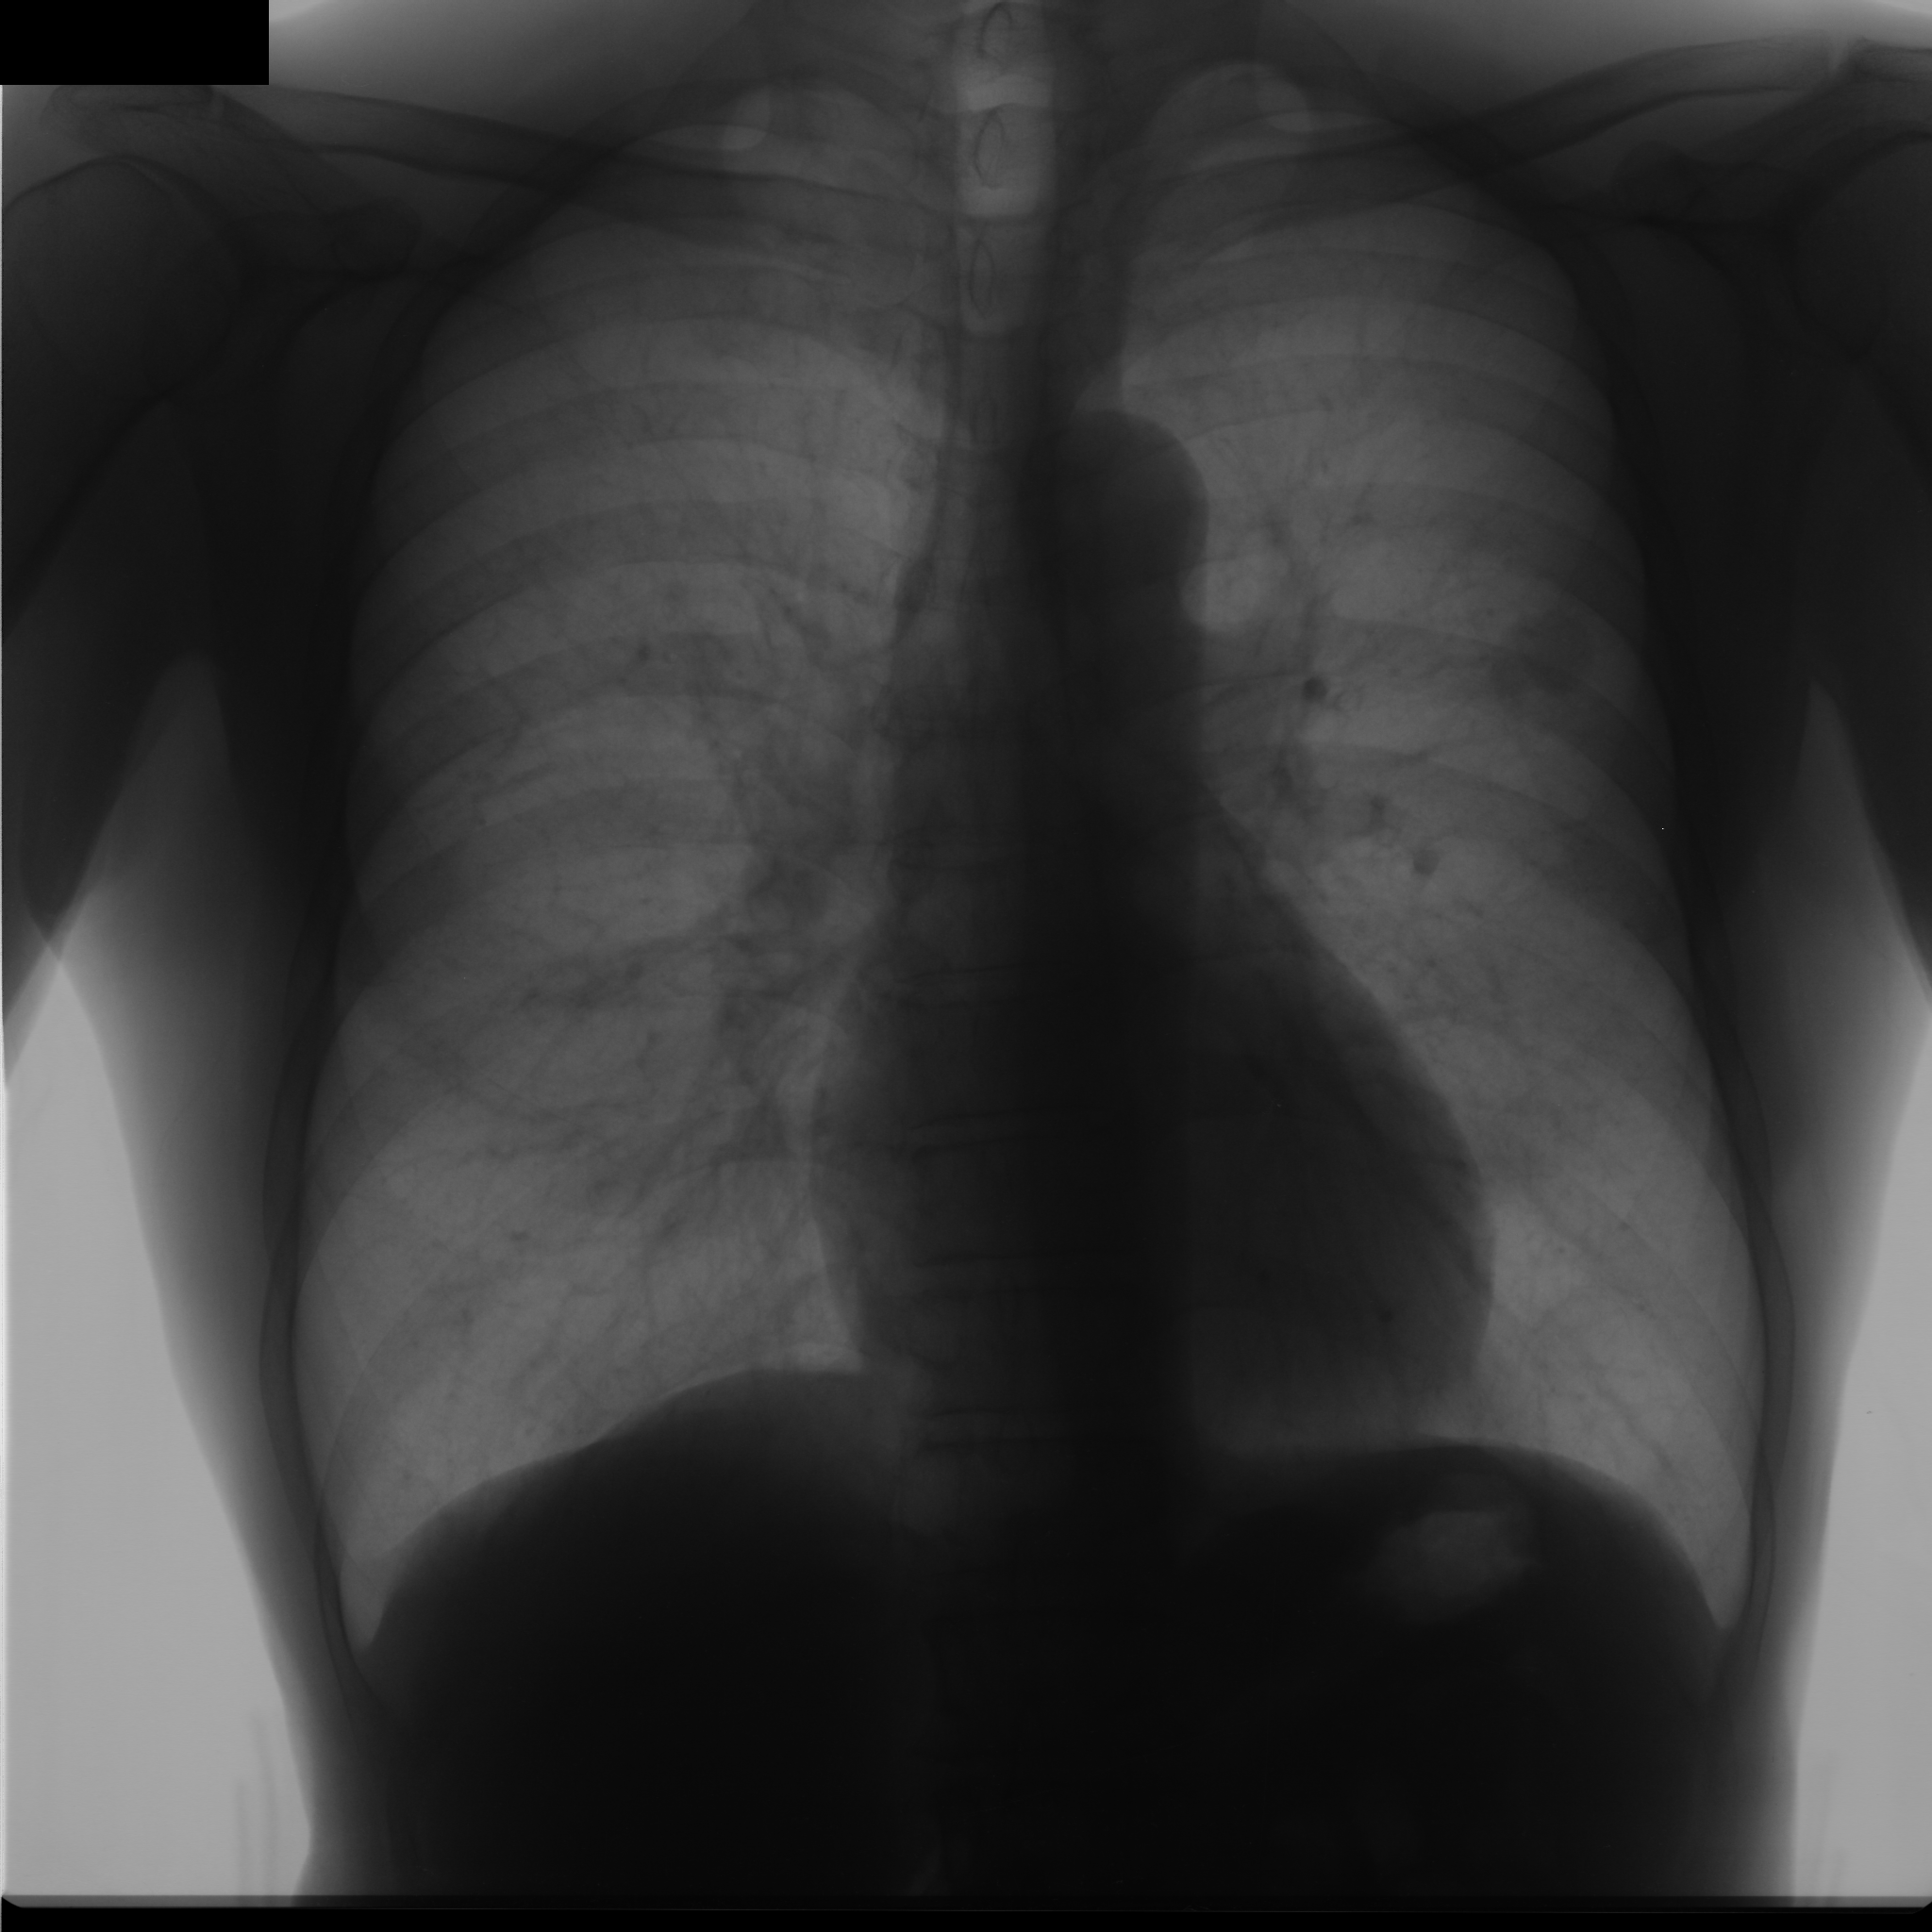

In [121]:
raw_image = util.load_image("/home/matt/All247images/JPCLN001.IMG")
subsampled_image = util.resample_image(raw_image)
img = Image.fromarray(subsampled_image, 'L')
#print raw_image[0][0] == 4095
#pylab.figure(figsize=(10, 10))
#imshow(raw_image, cmap='Greys_r')
display_image(raw_image)

In [124]:
# Setup storage
PROJECT_ID = "bmi260-1322"
header_values = {"x-goog-project-id": PROJECT_ID}

# URI scheme for Cloud Storage.
GOOGLE_STORAGE = 'gs'

# URI scheme for accessing local files.
LOCAL_FILE = 'file'

# Create bucket's URI
uri = boto.storage_uri('bmi260-project-data', GOOGLE_STORAGE)
bucket = uri.get_bucket(headers=header_values)


In [161]:
# Load truth data
truth = util.load_truth_data(bucket)
truth

,age,diagnosis,location,pathology,sex,size,subtlety,x,y
filename,,,,,,,,,
JPCLN001.IMG,53,lung cancer,l.upper,malignant,male,15.0,5.0,1634.0,692.0
JPCLN002.IMG,78,pulmonary hematoma,l.upper,benign,female,30.0,5.0,1614.0,1090.0
JPCLN003.IMG,63,lung cancer,l.upper,malignant,female,30.0,5.0,1303.0,447.0
JPCLN004.IMG,68,inflammatory mass,r.upper,benign,female,14.0,5.0,606.0,836.0
JPCLN005.IMG,73,lung cancer,l.upper,malignant,female,35.0,5.0,1438.0,692.0
JPCLN006.IMG,64,tuberculoma,r.upper,benign,female,14.0,5.0,660.0,524.0
JPCLN007.IMG,69,lung cancer,r.upper,malignant,male,18.0,5.0,459.0,852.0
JPCLN008.IMG,44,granuloma,r.lower,benign,female,10.0,5.0,508.0,938.0
JPCLN009.IMG,61,lung cancer,l.lower,malignant,female,28.0,5.0,1593.0,930.0
